In [14]:
import pandas as pd
import seaborn as sns
import numpy as np

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [16]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [17]:
### Cleanup of data
penguins = sns.load_dataset("penguins").dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [18]:
class ClusterResults:
    
    def __init__(self, clusterNr, coefficient):
        self.clusterNr = clusterNr
        self.coefficient = coefficient
    
    def __str__(self):
        return f"Cluster: {self.clusterNr}, Coefficient: {self.coefficient}\n"

def determineHighestSilhoueteScore(times, featuresSet, dataset):
    highest = None
    Hig = []
    
    for i in range(2, times):
        km = KMeans(n_clusters=i, random_state=43).fit(dataset[featuresSet])
        result = metrics.silhouette_score(dataset[featuresSet], km.labels_, metric='euclidean')
        Hig.append(result)
    
    return f"Index {Hig.index(max(Hig)) + 2} coefficient: {max(Hig)}"

### Pairplot penguin

In [19]:
sns.pairplot(penguins)

I do see clusters.

Based on the pairplot, I think there are 3 clusters visible from the plots. One left up corner, right up corner and straight line from left down to right up corner.

### Calculate the Silhouette Coefficient for your clustering. Play around with the features and n_clusters to search for better results. Keep the cluster model with the highest Silhouette Coefficient.

In [20]:
features = ['body_mass_g','bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
print(determineHighestSilhoueteScore(10, features, penguins))

features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
print(determineHighestSilhoueteScore(10, features, penguins))

features = ['body_mass_g','bill_length_mm', 'bill_depth_mm',]
print(determineHighestSilhoueteScore(10, features, penguins))

features = ['body_mass_g','bill_length_mm']
print(determineHighestSilhoueteScore(10, features, penguins))

features = ['bill_depth_mm', 'flipper_length_mm']
print(determineHighestSilhoueteScore(10, features, penguins))

features = ['bill_length_mm', 'bill_depth_mm']
print(determineHighestSilhoueteScore(10, features, penguins))

features = ['body_mass_g', 'bill_depth_mm']
print(determineHighestSilhoueteScore(10, features, penguins))

features = ['bill_length_mm', 'flipper_length_mm']
print(determineHighestSilhoueteScore(10, features, penguins))

features = ['bill_depth_mm']
print(determineHighestSilhoueteScore(10, features, penguins))

features = ['bill_length_mm']
print(determineHighestSilhoueteScore(10, features, penguins))

features = ['body_mass_g']
print(determineHighestSilhoueteScore(10, features, penguins))

features = ['flipper_length_mm']
print(determineHighestSilhoueteScore(10, features, penguins))

Index 2 coefficient: 0.6307117469850305
Index 2 coefficient: 0.6076539010738694
Index 2 coefficient: 0.6309369023049172
Index 2 coefficient: 0.6309576915319268
Index 2 coefficient: 0.6788625305669964
Index 2 coefficient: 0.5737973500882437
Index 2 coefficient: 0.6310839036540167
Index 2 coefficient: 0.6117940477662408
Index 2 coefficient: 0.6175817538763124
Index 2 coefficient: 0.6440353676082992
Index 2 coefficient: 0.6311263474530514
Index 2 coefficient: 0.6892852079650291


In [23]:
features = ['flipper_length_mm']

km = KMeans(n_clusters=2, random_state=43).fit(penguins[features])
result = metrics.silhouette_score(penguins[features], km.labels_, metric='euclidean')
print(result)
penguins['cluster_results'] = km.predict(penguins[features])



0.6892852079650291


In [25]:
penguins.cluster_results.value_counts()

1    204
0    129
Name: cluster_results, dtype: int64

#### Use the pairplot(hue='cluster') function to observe how the model has clustered the data.

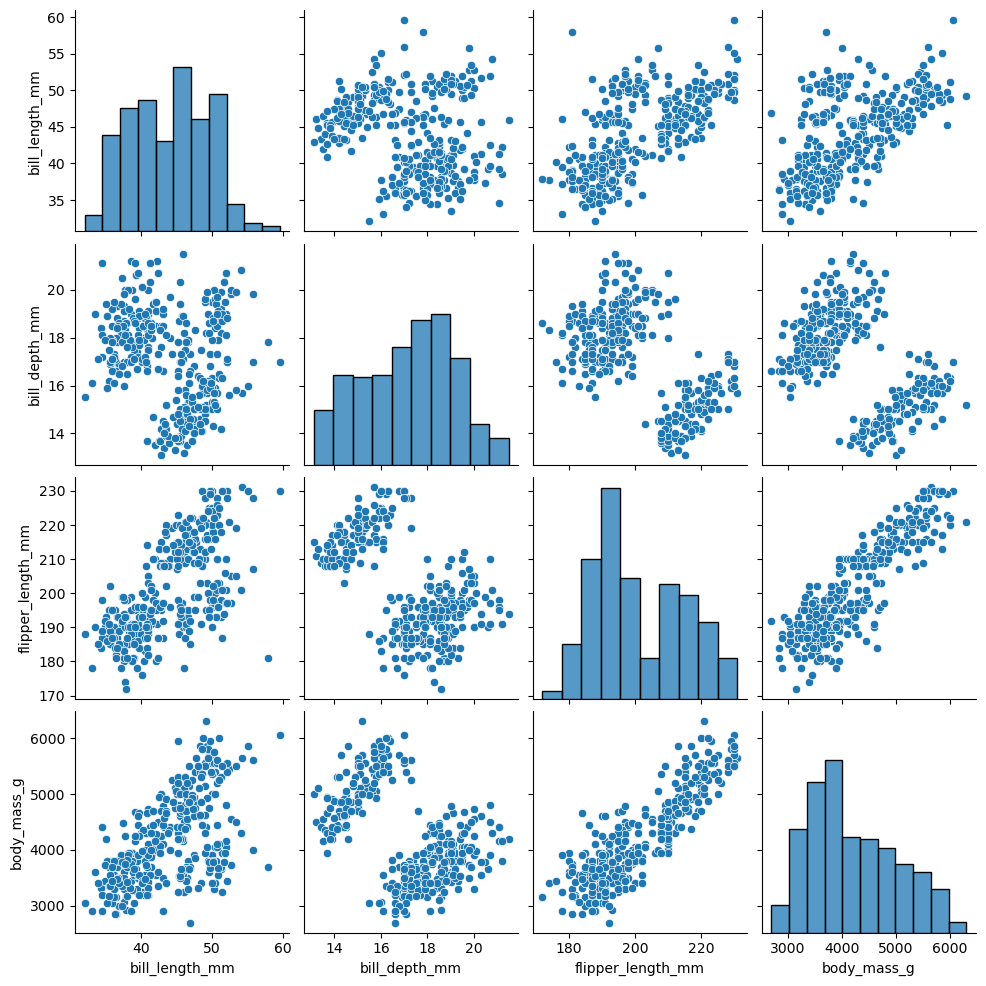

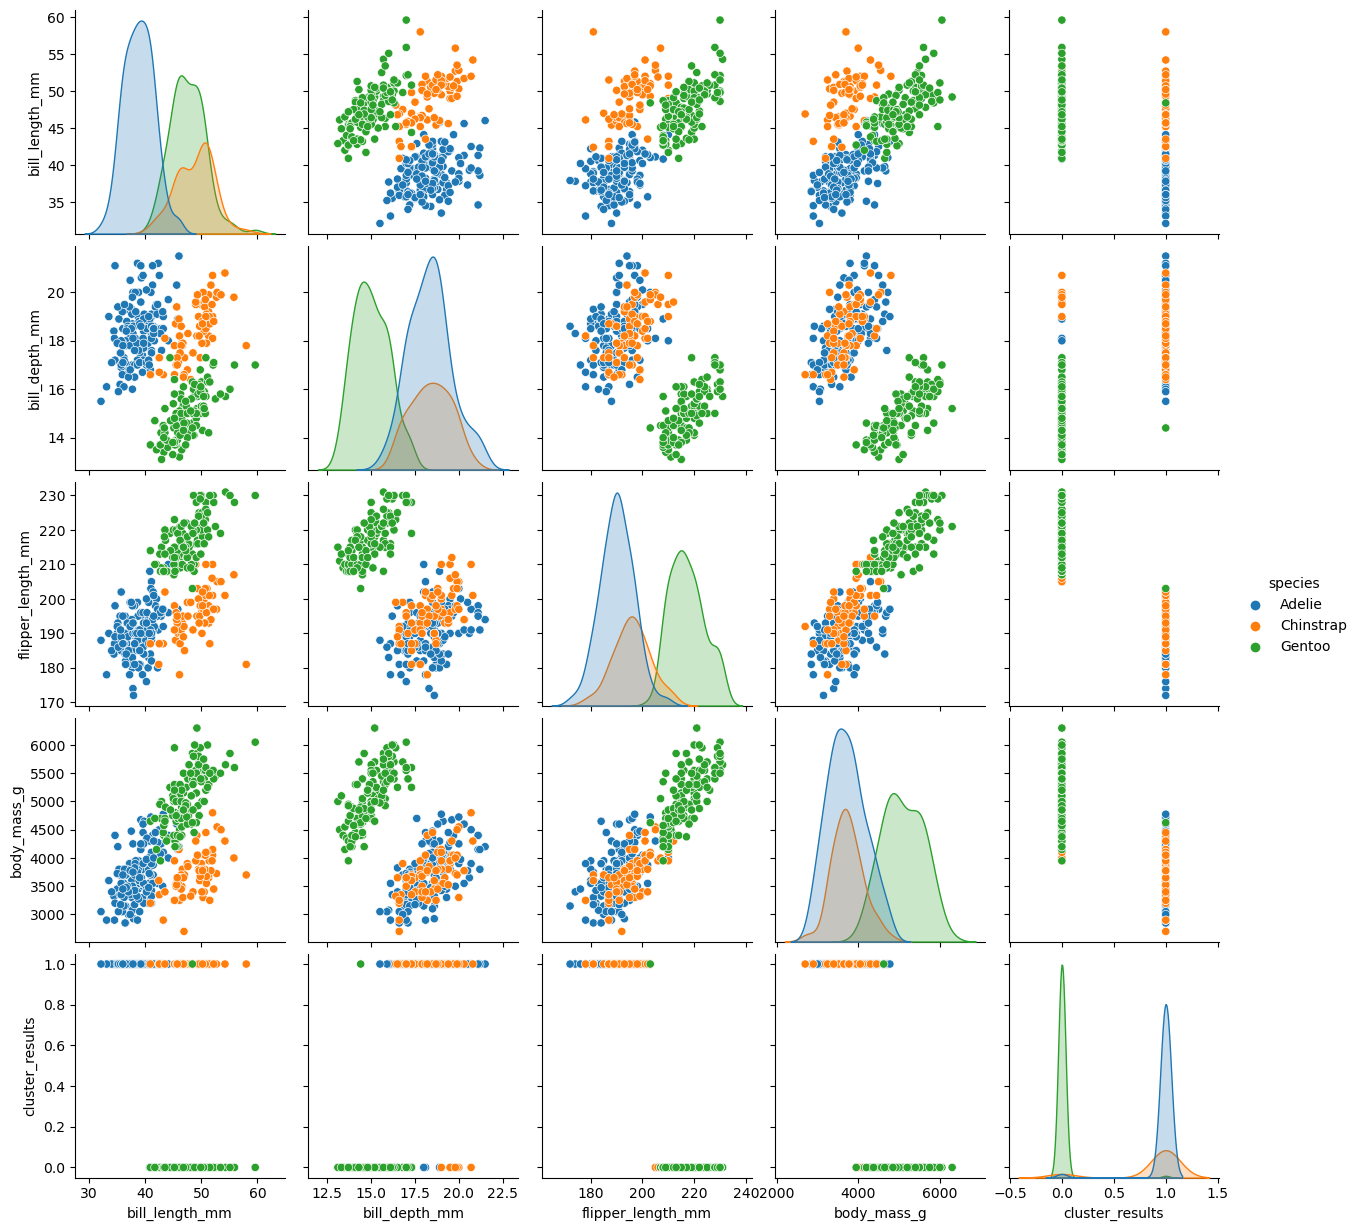

In [26]:
sns.pairplot(penguins, hue="species")
plt.show()

In [27]:
contingency_table = penguins.groupby(['species','cluster_results']).size().unstack('cluster_results', fill_value=0)
contingency_table

cluster_results,0,1
species,,
Adelie,3,143
Chinstrap,8,60
Gentoo,118,1


#### We know the species of each penguin. Use a contingency table to reveal the relation between the cluster results and the species. Is there an exact match? Are there species which ended up in the same cluster? If so, what does it mean that they ended up in the same cluster?
It can be concluded that the penguin species Adelie and Chinstrap are mostly grouped by in cluster 0 and 2. No Adelie and Chinstrap species in cluster 3
Cluster 1 and 3 are mainly populated by Gentoo species penguins, 3 exclusively Gentoo.

It can be said that cluster 3 is populated exclusively by Gentoo Penguins. Penguins with similiar flipper length will be grouped in cluster 1 or 3 and cluster 0 and 2.